# Example Ordering

In this example notebook, we will repeat the operations of the Example Operations notebook and time them:

1. Locate the entries in an STM which intersect building polygons;
2. Add year of construction as an attribute to the STM.

Then we will order the STM according to the Morton code of the pixel coordinates and repeat these operations, again timing them.

Finally, we will visualize the change in the order of the elements and compare the processing times.

## Repeat example operations 

For setup and more notes on the operations, see [Example Operations notebook](./demo_operations_stm.ipynb)

Note that this can take a few minutes.

In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import stmtools

path_stm = Path('./stm.zarr')
#chunksize = 10000
chunksize = 500
path_polygon = Path('bag_light_AMS_WGS84.gpkg')
fields_to_query = ['bouwjaar']

In [2]:
# Example operations on original STM.
stmat = xr.open_zarr(path_stm)
stmat = stmat.chunk({"space": chunksize, "time": -1})
stmat_subset = stmat.stm.subset(method='polygon', polygon=path_polygon)
stmat_enriched = stmat_subset.stm.enrich_from_polygon(path_polygon, fields_to_query)
year_construction = stmat_enriched['bouwjaar'].compute()

/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():


In [3]:
print(stmat)

<xarray.Dataset> Size: 14MB
Dimensions:    (space: 78582, time: 10)
Coordinates:
    azimuth    (space) int64 629kB dask.array<chunksize=(500,), meta=np.ndarray>
    lat        (space) float32 314kB dask.array<chunksize=(500,), meta=np.ndarray>
    lon        (space) float32 314kB dask.array<chunksize=(500,), meta=np.ndarray>
    range      (space) int64 629kB dask.array<chunksize=(500,), meta=np.ndarray>
  * time       (time) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: space
Data variables:
    amplitude  (space, time) float32 3MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    complex    (space, time) complex64 6MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    phase      (space, time) float32 3MB dask.array<chunksize=(500, 10), meta=np.ndarray>
Attributes:
    multi-look:  coarsen-mean


In [4]:
print(stmat_subset)

<xarray.Dataset> Size: 5MB
Dimensions:    (space: 26269, time: 10)
Coordinates:
    azimuth    (space) int64 210kB dask.array<chunksize=(500,), meta=np.ndarray>
    lat        (space) float32 105kB dask.array<chunksize=(500,), meta=np.ndarray>
    lon        (space) float32 105kB dask.array<chunksize=(500,), meta=np.ndarray>
    range      (space) int64 210kB dask.array<chunksize=(500,), meta=np.ndarray>
  * time       (time) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: space
Data variables:
    amplitude  (space, time) float32 1MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    complex    (space, time) complex64 2MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    phase      (space, time) float32 1MB dask.array<chunksize=(500, 10), meta=np.ndarray>
Attributes:
    multi-look:  coarsen-mean


### Compute timing statistics for the operations

Note that these timing tests were not performed immediately, because the ```%timeit``` magic function does not allow variable assignment.

In [5]:
# Compute timings of operations on original STM.
time_subset = %timeit -o stmat.stm.subset(method='polygon', polygon=path_polygon)
time_enrich = %timeit -o stmat_subset.stm.enrich_from_polygon(path_polygon, fields_to_query)
time_enrich_compute = %timeit -o stmat_enriched['bouwjaar'].compute()

/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():
/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():
/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():
/storag

9min 29s ± 1min 11s per loop (mean ± std. dev. of 7 runs, 1 loop each)
31.3 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3min 47s ± 32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Reorder STM and repeat operations

In [6]:
# Reorder STM.
stmat_ordered = stmat.stm.reorder(xlabel="azimuth", ylabel="range")

/storage/miniforge3/envs/mbl_stmtools/lib/python3.11/site-packages/xarray/core/indexing.py:1430: PerformanceWarning: Slicing with an out-of-order index is generating 169 times more chunks
  return self.array[key]


In [8]:
# Repeat example operations on ordered STM.
stmat_ordered_subset = stmat_ordered.stm.subset(method='polygon', polygon=path_polygon)
stmat_ordered_enriched = stmat_ordered_subset.stm.enrich_from_polygon(path_polygon, fields_to_query)
year_construction = stmat_enriched['bouwjaar'].compute()

/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():


In [9]:
print(stmat_ordered)

<xarray.Dataset> Size: 15MB
Dimensions:    (space: 78582, time: 10)
Coordinates:
    azimuth    (space) int64 629kB dask.array<chunksize=(500,), meta=np.ndarray>
    lat        (space) float32 314kB dask.array<chunksize=(500,), meta=np.ndarray>
    lon        (space) float32 314kB dask.array<chunksize=(500,), meta=np.ndarray>
    range      (space) int64 629kB dask.array<chunksize=(500,), meta=np.ndarray>
  * time       (time) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: space
Data variables:
    amplitude  (space, time) float32 3MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    complex    (space, time) complex64 6MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    phase      (space, time) float32 3MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    order      (space) int64 629kB dask.array<chunksize=(500,), meta=np.ndarray>
Attributes:
    multi-look:  coarsen-mean


In [10]:
print(stmat_ordered_subset)

<xarray.Dataset> Size: 5MB
Dimensions:    (space: 26269, time: 10)
Coordinates:
    azimuth    (space) int64 210kB dask.array<chunksize=(500,), meta=np.ndarray>
    lat        (space) float32 105kB dask.array<chunksize=(500,), meta=np.ndarray>
    lon        (space) float32 105kB dask.array<chunksize=(500,), meta=np.ndarray>
    range      (space) int64 210kB dask.array<chunksize=(500,), meta=np.ndarray>
  * time       (time) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: space
Data variables:
    amplitude  (space, time) float32 1MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    complex    (space, time) complex64 2MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    phase      (space, time) float32 1MB dask.array<chunksize=(500, 10), meta=np.ndarray>
    order      (space) int64 210kB dask.array<chunksize=(500,), meta=np.ndarray>
Attributes:
    multi-look:  coarsen-mean


### Compute timing statistics for the operations above.

In [11]:
# Compute timings of ordering STM.
time_ordering = %timeit -o stmat.stm.reorder(xlabel="azimuth", ylabel="range")

8.84 s ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# Compute timings of operations on ordered STM.
time_ordered_subset = %timeit -o stmat_ordered.stm.subset(method='polygon', polygon=path_polygon)
time_ordered_enrich = %timeit -o stmat_ordered_subset.stm.enrich_from_polygon(path_polygon, fields_to_query)
time_ordered_enrich_compute = %timeit -o stmat_ordered_enriched['bouwjaar'].compute()

/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():
/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():
/storage/MobyLe/stmtools/stmtools/stm.py:134: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if dim not in self._obj.dims.keys():
/storag

5min ± 9.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
30.1 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5min 48s ± 35.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Visualize the results

The images below are colored by element index.

In [13]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

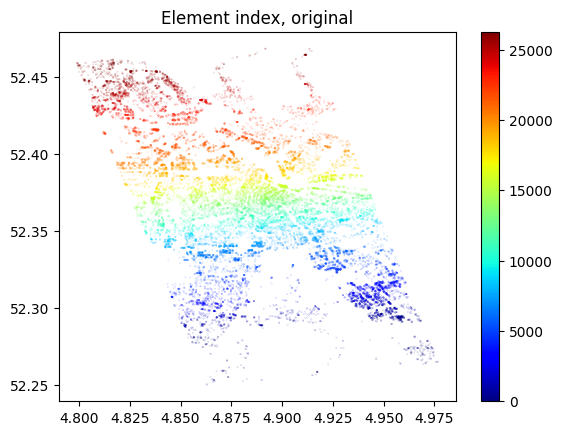

In [14]:
# Visualize original results.
fig, ax = plt.subplots()
plt.title("Element index, original")
plt.scatter(stmat_enriched.lon.data, stmat_enriched.lat.data, c=np.arange(len(stmat_enriched.lon)), s=0.004, cmap=cm.jet)
plt.colorbar()

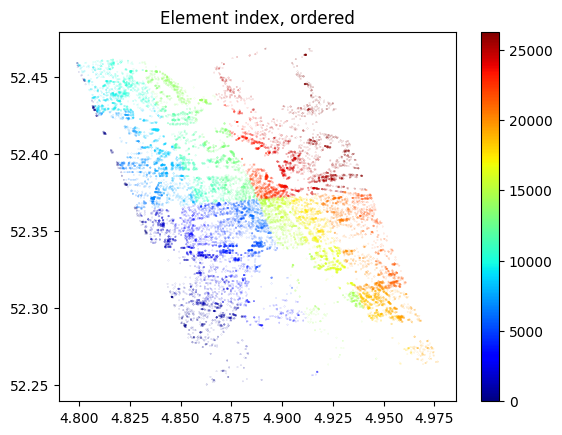

In [15]:
# Visualize ordered results.
fig, ax = plt.subplots()
plt.title("Element index, ordered")
plt.scatter(stmat_ordered_enriched.lon.data, stmat_ordered_enriched.lat.data, c=np.arange(len(stmat_ordered_enriched.lon)), s=0.004, cmap=cm.jet)
plt.colorbar()

### Compare operation times

In [16]:
print(f"Subset (original):  {time_subset}")
print(f"Enrich (original):  {time_enrich}")
print(f"Compute (original): {time_enrich_compute}")

Subset (original):  9min 29s ± 1min 11s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Enrich (original):  31.3 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Compute (original): 3min 47s ± 32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
print(f"Ordering:           {time_ordering}")

Ordering:           8.84 s ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
print(f"Subset (ordered):   {time_ordered_subset}")
print(f"Enrich (ordered):   {time_ordered_enrich}")
print(f"Compute (ordered):  {time_ordered_enrich_compute}")

Subset (ordered):   5min ± 9.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Enrich (ordered):   30.1 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Compute (ordered):  5min 48s ± 35.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
print(f"Subset (diff):      {time_subset.average-time_ordered_subset.average}")
print(f"Enrich (diff):      {time_enrich.average-time_ordered_enrich.average}")
print(f"Compute (diff):     {time_enrich_compute.average-time_ordered_enrich_compute.average}")

Subset (diff):      268.52550963370595
Enrich (diff):      0.0011994481876692054
Compute (diff):     -120.70962726159323
